### Importación librerias requeridas
### Obtener conexión y generar consulta ppal

In [39]:
import os
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import tkinter as tk
from tkcalendar import Calendar

load_dotenv()

%run conexionDB.ipynb

# Obtener la conexión
engine = obtener_conexion()

#### Calcular fechas dinámicamente permitiendo al usuario seleccionarlas a través de un Calendario

#### Análisis de todos los Tickets recibidos por todas las áreas de la entidad.

In [47]:
# Variable global para almacenar el dataframe
df = None

# Función para obtener la fecha seleccionada
def obtener_fechas():
    global df  # Usar la variable global

    # Obtiene las fechas seleccionadas
    fecha_inicio = calendar_inicio.get_date()
    fecha_fin = calendar_fin.get_date()
    
    # Convertir las fechas a formato adecuado
    fecha_inicio = str(fecha_inicio)
    fecha_fin = str(fecha_fin)
    
    # Crear la consulta SQL con las fechas seleccionadas
    query = f"""
    SELECT os.number AS 'No', 
    	   dep.id,
           dep.name AS 'Área',       
    	   osd.priority,
           tp.priority as npriority,
    	   sla.grace_period,
           ht.topic,
           sla.name,       
           osd.subject as Titulo, 
           DATE_ADD(os.created, INTERVAL -6 HOUR) as Creado,
           DATE_ADD(os.closed, INTERVAL -6 HOUR) as Cerrado, 
           DATE_ADD(os.reopened, INTERVAL -6 HOUR) as Reabierto,
    	   us.name AS 'Usuario'
    FROM ost_ticket AS os
    LEFT JOIN ost_ticket__cdata AS osd ON os.ticket_id = osd.ticket_id
    LEFT JOIN ost_sla AS sla ON os.sla_id = sla.id
    LEFT JOIN ost_help_topic AS ht ON os.topic_id = ht.topic_id
    LEFT JOIN ost_ticket_priority AS tp ON osd.priority = tp.priority_id
    LEFT JOIN ost_department AS dep ON os.dept_id = dep.id
    LEFT JOIN ost_user AS us ON os.user_id = us.id
    WHERE DATE_ADD(os.created, INTERVAL -6 HOUR) BETWEEN '{fecha_inicio}' AND DATE_ADD('{fecha_fin}', INTERVAL 1 DAY)
    ORDER BY os.created
    """    
    
    # Imprimir la consulta para verificar
    print(query)
    
    # Ejecutar la consulta y almacenar los resultados en la variable global
    df = pd.read_sql(query, engine)
    
    # Cerrar la ventana
    ventana.destroy()
    #Aca finaliza la función obtener_fechas()

# Crear la ventana principal
ventana = tk.Tk()
ventana.title("Seleccionar Fechas")

# Etiquetas
tk.Label(ventana, text="Fecha Inicial").grid(row=0, column=0, padx=10, pady=10)
tk.Label(ventana, text="Fecha Final").grid(row=1, column=0, padx=10, pady=10)

# Crear calendario para la fecha de inicio
calendar_inicio = Calendar(ventana, date_pattern='yyyy-mm-dd', locale="es_ES",
                          background = "blue",
                          foreground = "white",
                          selectbackground = "red",
                          normalbackground = "lightblue",
                          weekendbackground = "darkblue",
                          weekendforeground = "white")                          
calendar_inicio.grid(row=0, column=1, padx=10, pady=10)

# Crear calendario para la fecha de fin
calendar_fin = Calendar(ventana, date_pattern='yyyy-mm-dd', locale="es_ES",
                          background = "blue",
                          foreground = "white",
                          selectbackground = "red",
                          normalbackground = "lightblue",
                          weekendbackground = "darkblue",
                          weekendforeground = "white")                          
calendar_fin.grid(row=1, column=1, padx=10, pady=10)

# Botón para obtener las fechas y ejecutar la consulta llamando la función previamente creada obtener_fechas()
boton = tk.Button(ventana, text="Obtener resultados", command=obtener_fechas)
boton.grid(row=2, column=0, columnspan=2, pady=20)

# Iniciar la interfaz
ventana.mainloop()

# Imprimir el dataframe global después de que la ventana se cierre
if df is not None:
    print(df)


    SELECT os.number AS 'No', 
    	   dep.id,
           dep.name AS 'Área',       
    	   osd.priority,
           tp.priority as npriority,
    	   sla.grace_period,
           ht.topic,
           sla.name,       
           osd.subject as Titulo, 
           DATE_ADD(os.created, INTERVAL -6 HOUR) as Creado,
           DATE_ADD(os.closed, INTERVAL -6 HOUR) as Cerrado, 
           DATE_ADD(os.reopened, INTERVAL -6 HOUR) as Reabierto,
    	   us.name AS 'Usuario'
    FROM ost_ticket AS os
    LEFT JOIN ost_ticket__cdata AS osd ON os.ticket_id = osd.ticket_id
    LEFT JOIN ost_sla AS sla ON os.sla_id = sla.id
    LEFT JOIN ost_help_topic AS ht ON os.topic_id = ht.topic_id
    LEFT JOIN ost_ticket_priority AS tp ON osd.priority = tp.priority_id
    LEFT JOIN ost_department AS dep ON os.dept_id = dep.id
    LEFT JOIN ost_user AS us ON os.user_id = us.id
    WHERE DATE_ADD(os.created, INTERVAL -6 HOUR) BETWEEN '2024-09-03' AND DATE_ADD('2025-01-17', INTERVAL 1 DAY)
    ORDER BY os.crea

### Revisar la estructura del DataFrame

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2731 entries, 0 to 2730
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   No            2731 non-null   object        
 1   id            2731 non-null   int64         
 2   Área          2731 non-null   object        
 3   priority      2731 non-null   object        
 4   npriority     2731 non-null   object        
 5   grace_period  2386 non-null   float64       
 6   topic         2731 non-null   object        
 7   name          2386 non-null   object        
 8   Titulo        2731 non-null   object        
 9   Creado        2731 non-null   datetime64[ns]
 10  Cerrado       2692 non-null   datetime64[ns]
 11  Reabierto     75 non-null     datetime64[ns]
 12  Usuario       2731 non-null   object        
dtypes: datetime64[ns](3), float64(1), int64(1), object(8)
memory usage: 277.5+ KB


### Identificar valores nulos

In [49]:
#df.isnull().values.any()
df.isnull().sum()

No                 0
id                 0
Área               0
priority           0
npriority          0
grace_period     345
topic              0
name             345
Titulo             0
Creado             0
Cerrado           39
Reabierto       2656
Usuario            0
dtype: int64

### Revisar los tipos de datos
#### Que exista concordancia con el dato almacenado.

In [51]:
df.dtypes

No                      object
id                       int64
Área                    object
priority                object
npriority               object
grace_period           float64
topic                   object
name                    object
Titulo                  object
Creado          datetime64[ns]
Cerrado         datetime64[ns]
Reabierto       datetime64[ns]
Usuario                 object
dtype: object

### Información estadística

In [23]:
df.describe()

,id,priority,grace_period,Creado,Cerrado,Reabierto,Diferencia_Cerrado
count,41126.000000,41126.000000,38394.000000,41126,41046,840,41046
mean,2.805184,2.001921,46.363651,2022-06-24 13:11:22.254705152,2022-06-24 11:31:04.479340288,2022-12-29 04:04:49.294047488,1 days 08:14:46.650952589
min,1.000000,1.000000,1.000000,2019-02-06 12:25:51,2019-02-06 15:04:03,2019-02-07 10:35:25,0 days 00:00:00
25%,2.000000,2.000000,2.000000,2021-02-08 16:15:45.249999872,2021-02-08 18:31:17.750000128,2022-05-04 05:58:08.750000128,0 days 00:16:15
50%,3.000000,2.000000,24.000000,2022-09-07 16:35:27,2022-09-08 11:19:27.500000,2023-03-01 16:59:59.500000,0 days 00:38:08.500000
75%,3.000000,2.000000,24.000000,2023-11-29 09:38:09.500000,2023-11-28 09:30:38.249999872,2024-03-19 11:47:46,0 days 01:54:25.750000
max,7.000000,3.000000,720.000000,2025-01-15 09:27:03,2025-01-15 09:37:54,2025-01-15 08:59:07,2165 days 03:46:31
std,1.310116,0.246303,112.007338,NaN,NaN,NaN,19 days 19:01:53.275099747


In [52]:
# Obtener el tiempo transcurrido entre la fecha de creación y el cierre del ticket.
df["Diferencia_Cerrado"] = df["Cerrado"] - df["Creado"]
df

,No,id,Área,priority,npriority,grace_period,topic,name,Titulo,Creado,Cerrado,Reabierto,Usuario,Diferencia_Cerrado
0,038473,3,TI - Registro,2,normal,NaN,SII,None,Sellos CB 730589,2024-09-03 08:17:30,2024-09-03 11:57:39,NaT,DUMAR CAMILO LOPEZ ARICAPA,0 days 03:40:09
1,038474,5,Comunicaciones,2,normal,NaN,Diseño de arte,None,Empresas en trayectoria MEGA,2024-09-03 08:21:29,2024-09-17 16:58:32,2024-09-12 12:44:24,JULIAN RICARDO GARCÍA,14 days 08:37:03
2,038475,3,TI - Registro,2,normal,2.0,SII,TI - Normal,cambio de sede,2024-09-03 08:42:29,2024-09-03 08:49:23,NaT,JORGE ALEJANDRO GUZMAN GARCIA,0 days 00:06:54
3,038476,1,TI - Administrativo,3,alta,1.0,Internet,TI - Alta,Revisión conexión,2024-09-03 09:08:36,2024-09-03 10:07:37,NaT,JENNY TATIANA CAMPOS,0 days 00:59:01
4,038477,4,Gestión Documental,3,alta,2.0,Apoyo Trámites,Gestión Documental - 2 horas,Solicitud Firma digital Docxflow,2024-09-03 09:10:34,2024-09-03 09:53:30,NaT,ANDRES JULIAN MENESES RODRIGUEZ,0 days 00:42:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,041198,1,TI - Administrativo,2,normal,2.0,Plugin Docxflow,TI - Normal,plugin docxflow,2025-01-16 17:09:16,2025-01-16 17:54:12,NaT,DIANA PATRICIA OCHOA ORTIZ,0 days 00:44:56
2727,041199,3,TI - Registro,2,normal,2.0,SII,TI - Normal,SOLICITUD HABILITACIÓN CODIGO,2025-01-16 17:14:55,2025-01-16 17:22:25,NaT,CINDY VANESA MARIN,0 days 00:07:30
2728,041200,7,Estudios Económicos,3,alta,48.0,Cifras Estadísticas,Estudios Económicos - Alta,Información empresas - Temporada Renovación 2025,2025-01-16 17:44:19,NaT,NaT,MIGUEL ÁNGEL VELA MEDINA,NaT
2729,041201,2,Infraestructura,1,baja,3.0,Mantenimiento,TI - Baja,SILLA,2025-01-17 07:54:55,NaT,NaT,ANDRES MAURICIO MATEUS RIVERA,NaT


In [44]:
df.duplicated().sum()

np.int64(0)

In [54]:
# Verificar valores únicos de priority
df["priority"].unique()

array(['2', '3', '1'], dtype=object)

In [55]:
# Eliminar posibles espacios en blanco de priority antes de convertirlo a int
df["priority"] = df["priority"].str.strip()

In [56]:
# Convertir priority (object) a priority(int) y así poderlo comparar (df["priority"] == 1)
df['priority'] = df['priority'].astype(int)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2731 entries, 0 to 2730
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   No                  2731 non-null   object         
 1   id                  2731 non-null   int64          
 2   Área                2731 non-null   object         
 3   priority            2731 non-null   int64          
 4   npriority           2731 non-null   object         
 5   grace_period        2386 non-null   float64        
 6   topic               2731 non-null   object         
 7   name                2386 non-null   object         
 8   Titulo              2731 non-null   object         
 9   Creado              2731 non-null   datetime64[ns] 
 10  Cerrado             2692 non-null   datetime64[ns] 
 11  Reabierto           75 non-null     datetime64[ns] 
 12  Usuario             2731 non-null   object         
 13  Diferencia_Cerrado  2692 non-null

In [59]:
# Convertir Diferencia_Cerrado a horas
df["Horas_Cerrado"] = df["Diferencia_Cerrado"].dt.total_seconds() / 3600

# Crear la columna Indicador con numpy.select
condiciones = [
    (df["priority"] == 1) & (df["Horas_Cerrado"] <= 3),
    (df["priority"] == 2) & (df["Horas_Cerrado"] <= 2),
    (df["priority"] == 3) & (df["Horas_Cerrado"] <= 1),
]

valores = ["Cumple", "Cumple", "Cumple"]

df["Indicador"] = np.select(condiciones, valores, default="No cumple")
df

,No,id,Área,priority,npriority,grace_period,topic,name,Titulo,Creado,Cerrado,Reabierto,Usuario,Diferencia_Cerrado,Horas_Cerrado,Indicador
0,038473,3,TI - Registro,2,normal,NaN,SII,None,Sellos CB 730589,2024-09-03 08:17:30,2024-09-03 11:57:39,NaT,DUMAR CAMILO LOPEZ ARICAPA,0 days 03:40:09,3.669167,No cumple
1,038474,5,Comunicaciones,2,normal,NaN,Diseño de arte,None,Empresas en trayectoria MEGA,2024-09-03 08:21:29,2024-09-17 16:58:32,2024-09-12 12:44:24,JULIAN RICARDO GARCÍA,14 days 08:37:03,344.617500,No cumple
2,038475,3,TI - Registro,2,normal,2.0,SII,TI - Normal,cambio de sede,2024-09-03 08:42:29,2024-09-03 08:49:23,NaT,JORGE ALEJANDRO GUZMAN GARCIA,0 days 00:06:54,0.115000,Cumple
3,038476,1,TI - Administrativo,3,alta,1.0,Internet,TI - Alta,Revisión conexión,2024-09-03 09:08:36,2024-09-03 10:07:37,NaT,JENNY TATIANA CAMPOS,0 days 00:59:01,0.983611,Cumple
4,038477,4,Gestión Documental,3,alta,2.0,Apoyo Trámites,Gestión Documental - 2 horas,Solicitud Firma digital Docxflow,2024-09-03 09:10:34,2024-09-03 09:53:30,NaT,ANDRES JULIAN MENESES RODRIGUEZ,0 days 00:42:56,0.715556,Cumple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,041198,1,TI - Administrativo,2,normal,2.0,Plugin Docxflow,TI - Normal,plugin docxflow,2025-01-16 17:09:16,2025-01-16 17:54:12,NaT,DIANA PATRICIA OCHOA ORTIZ,0 days 00:44:56,0.748889,Cumple
2727,041199,3,TI - Registro,2,normal,2.0,SII,TI - Normal,SOLICITUD HABILITACIÓN CODIGO,2025-01-16 17:14:55,2025-01-16 17:22:25,NaT,CINDY VANESA MARIN,0 days 00:07:30,0.125000,Cumple
2728,041200,7,Estudios Económicos,3,alta,48.0,Cifras Estadísticas,Estudios Económicos - Alta,Información empresas - Temporada Renovación 2025,2025-01-16 17:44:19,NaT,NaT,MIGUEL ÁNGEL VELA MEDINA,NaT,NaN,No cumple
2729,041201,2,Infraestructura,1,baja,3.0,Mantenimiento,TI - Baja,SILLA,2025-01-17 07:54:55,NaT,NaT,ANDRES MAURICIO MATEUS RIVERA,NaT,NaN,No cumple


In [60]:
# Totalizar los tickets que cumplen
(df["Indicador"] == "Cumple").sum()

np.int64(1894)

In [61]:
# Totalizar los tickets que NO cumplen
(df["Indicador"] == "No cumple").sum()

np.int64(837)

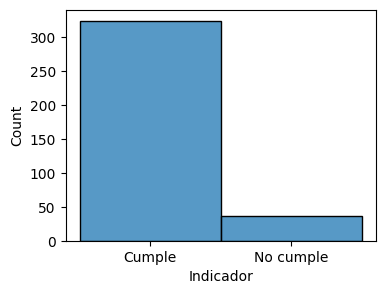

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (4,3))
sns.histplot(data = df, x = "Indicador", bins = 50)
plt.show()

In [62]:
# Contar el número de soportes que cumplen
soportes_cumplen = (df["Indicador"] == "Cumple").sum()

# Obtener el total de soportes recibidos
total_soportes = len(df)

indicador_final = (soportes_cumplen / total_soportes) * 100
print(f"Indicador mensual es: {indicador_final:.2f}%")

Indicador mensual es: 69.35%


In [24]:
df.to_csv("tickets.csv", index = False)

In [26]:
%pwd

'C:\\Users\\LiderTI\\Streaming de Google Drive\\Mi unidad\\Unicorn\\Proyecto Integrador Final\\Proyecto\\src'

In [ ]:
import pandas as pd

pd.read_csv("C:\\python\\tickets.csv")